In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
# knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import pylab as plot
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from scipy.stats import levene,shapiro,f_oneway

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
# for cross validation
from sklearn.cross_validation import cross_val_score

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Questiton 1

In [3]:
data = pd.read_csv('Automobile.csv')

In [4]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
normalized_losses,201.0,125.189055,33.572966,65.00,101.00,122.00,150.00,256.00
wheel_base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
curb_weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
engine_size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.329701,0.268166,2.54,3.15,3.31,3.58,3.94
stroke,201.0,3.261741,0.317875,2.07,3.11,3.29,3.46,4.17


In [8]:
data.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.474993,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.146355,0.018373,-0.182196,0.075287,0.279849,-0.035527,0.036233,-0.082391
normalized_losses,0.474993,1.000000,0.007815,0.103659,0.153752,-0.335476,0.178547,0.174788,0.007498,0.062666,-0.120846,0.276665,0.211812,-0.301206,-0.264594,0.208886
wheel_base,-0.535987,0.007815,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.362642,-0.470606,-0.543304,0.584642
length,-0.365404,0.103659,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.281932,-0.665192,-0.698142,0.690628
width,-0.242423,0.153752,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.242569,-0.633531,-0.680635,0.751265
height,-0.550160,-0.335476,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.311922,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.178547,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.279027,-0.749543,-0.794889,0.834415
engine_size,-0.110581,0.174788,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.254961,-0.650546,-0.679571,0.872335
bore,-0.146355,0.007498,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.269486,-0.576954,-0.586917,0.543052
stroke,0.018373,0.062666,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.019004,-0.053955,-0.051793,0.081434


C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


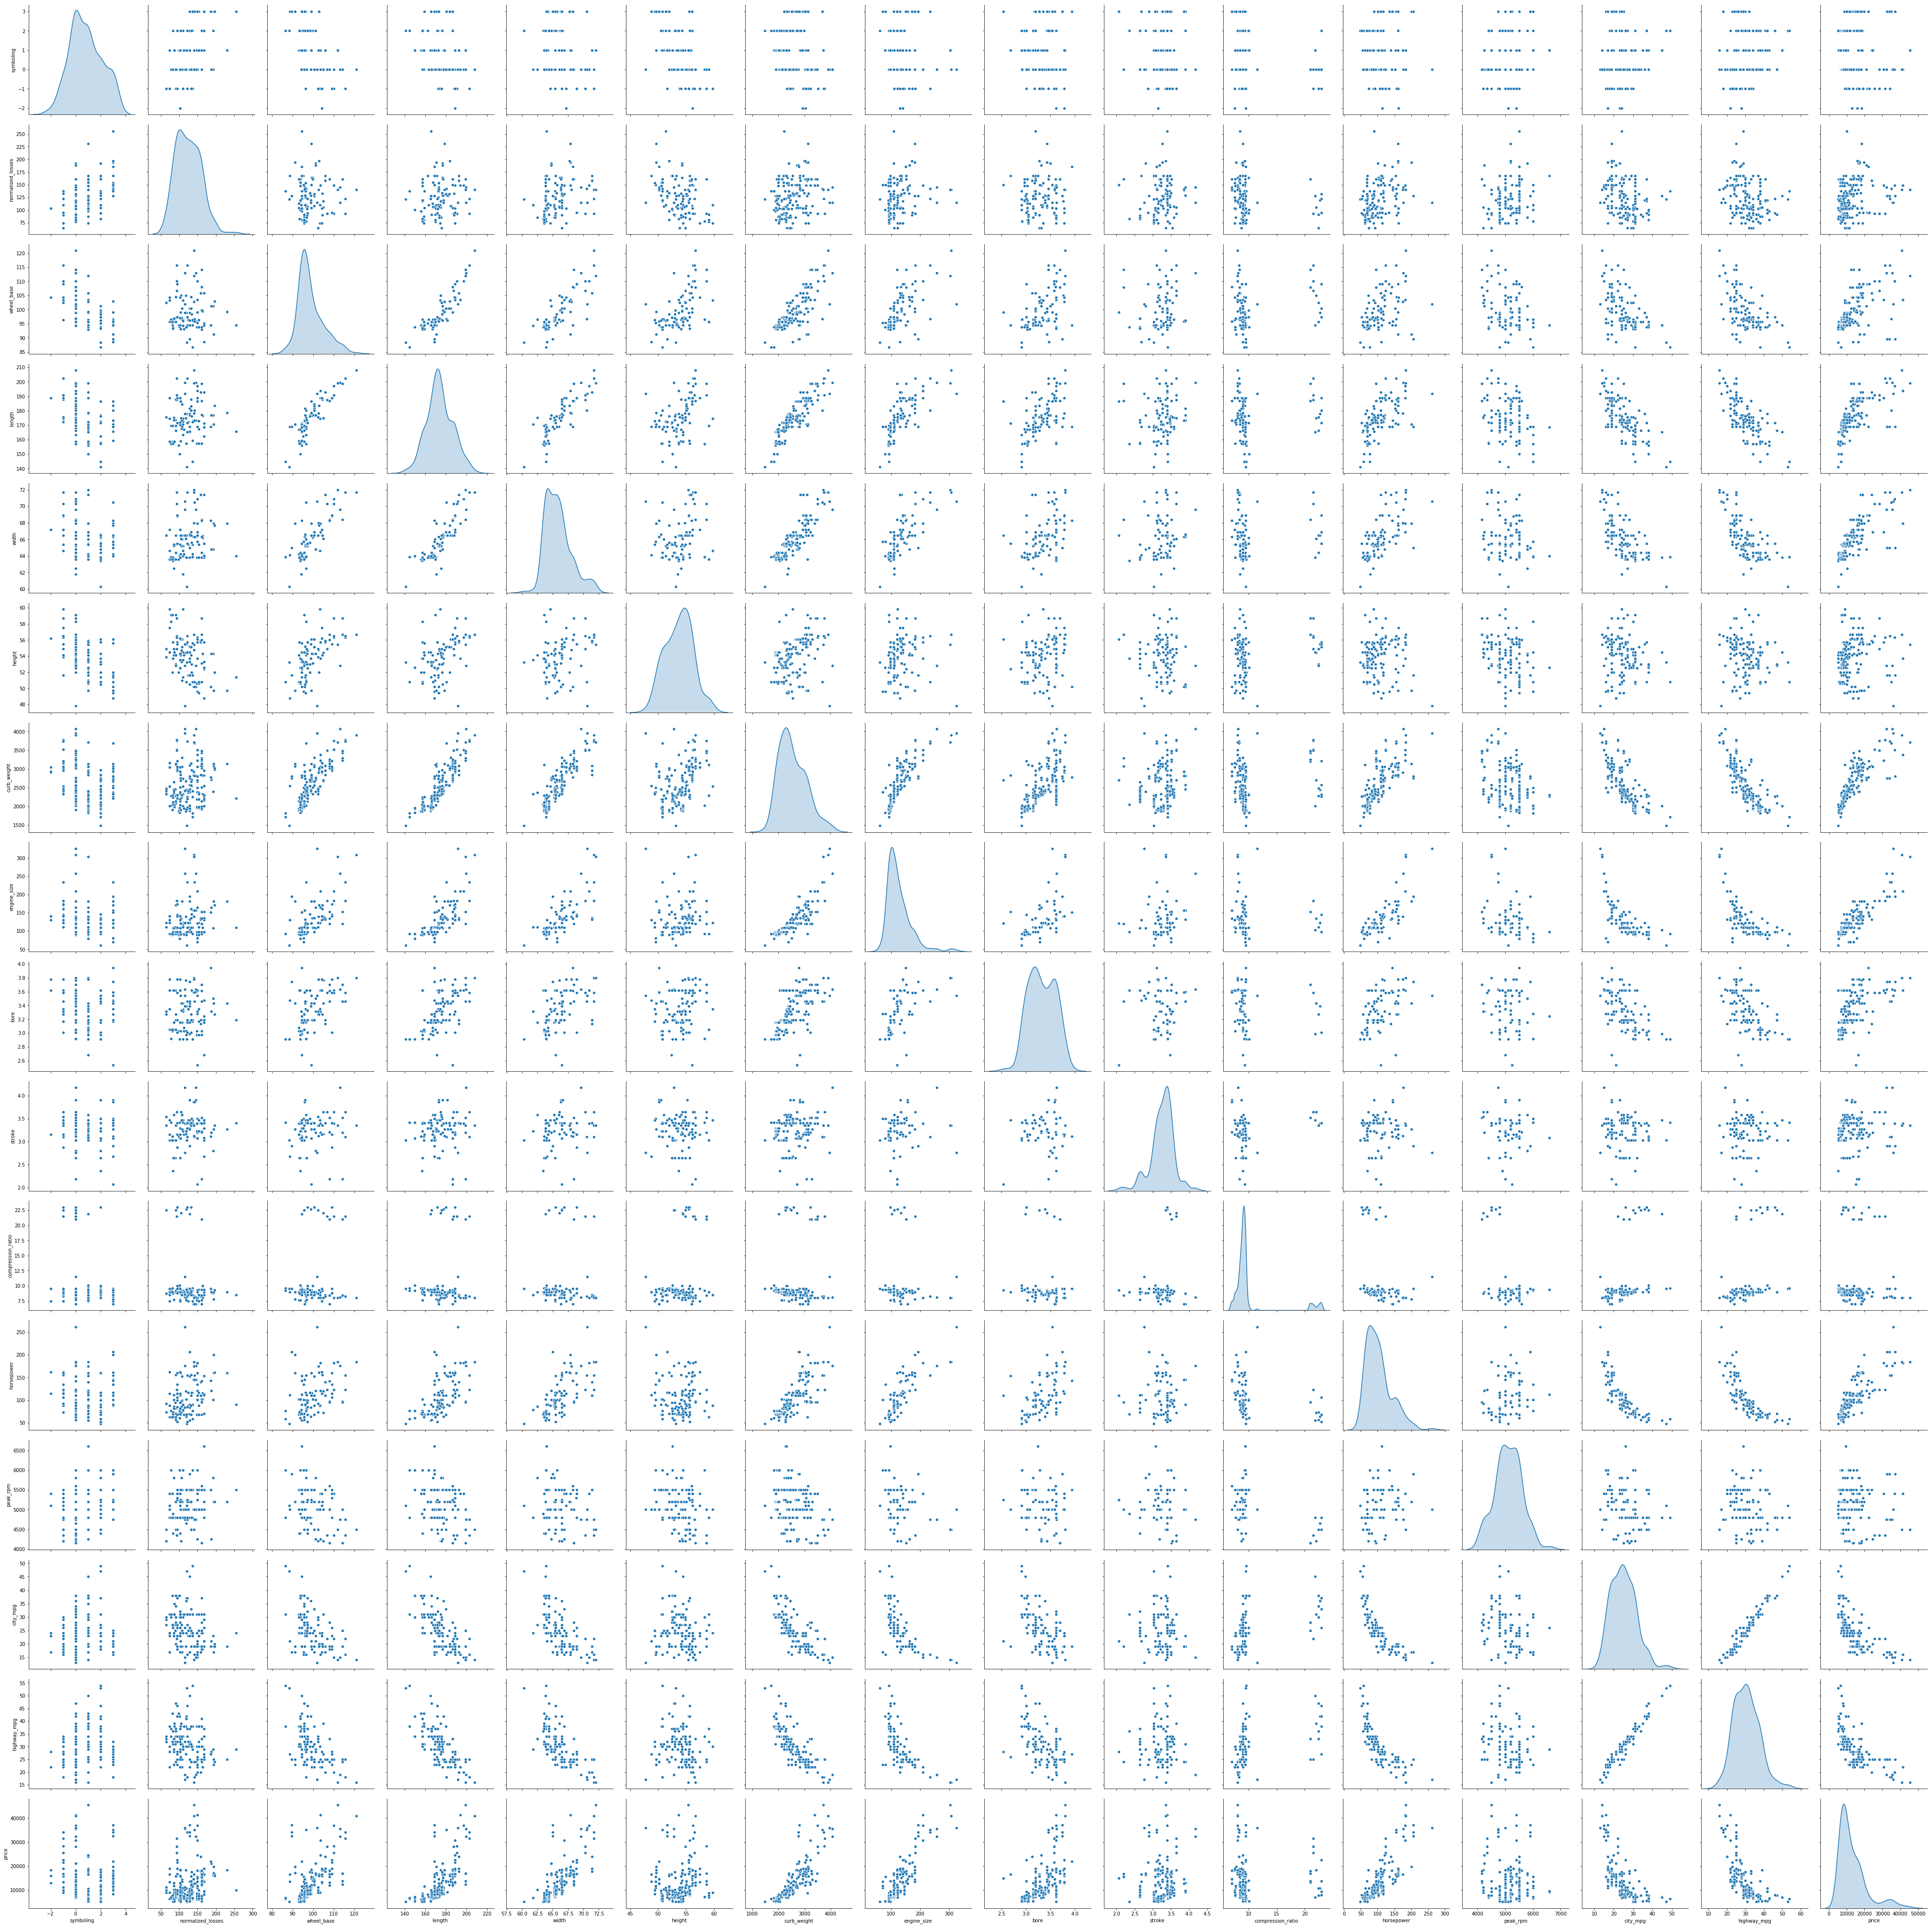

In [9]:
sns.pairplot(data,diag_kind='kde',height=3.5)

In [10]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [53]:
m0=smf.ols('city_mpg~symboling+length+curb_weight+engine_size+compression_ratio+horsepower',data).fit()

In [54]:
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               city_mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           3.19e-76
Time:                        11:29:41   Log-Likelihood:                -469.99
No. Observations:                 201   AIC:                             954.0
Df Residuals:                     194   BIC:                             977.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            60.4927      4.280     14.135      0.000      52.052      68.933
symboling            -0.6117      0.168     -3.645      0.000      -0.943      -0.281
length               -0.1175      0.034     -3.457      0.001      -0.185      -0.050
curb_weight          -0.0072      0.001     -6.249      0.000      -0.009      -0.005
engine_size           0.0547      0.010      5.608      0.000       0.035       0.074
compression_ratio     0.5256      0.054      9.764      0.000       0.419       0.632
horsepower           -0.0794      0.011     -7.432      0.000      -0.101      -0.058
==============================================================================
Omnibus:                       67.040   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.926
Skew:                           1.266   Prob(JB):                     1.09e-58
Kurtosis:                       8.045   Cond. No.                     6.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We have dropped the variables which have high p values.
# r square is .84

In [39]:
x=data[['symboling','length','curb_weight','engine_size','compression_ratio','horsepower']]

y=data[['city_mpg']]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [41]:
x_train.shape

(140, 6)

In [42]:
x_test.shape

(61, 6)

In [43]:
y_train.shape

(140, 1)

In [44]:
y_test.shape

(61, 1)

In [46]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 55.66426457717773


In [49]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test, y_test)

0.8218200455237936

In [50]:
# So the model explains 82.18% of the variability in Y using X

In [52]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [55]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

2.8014386377341705

In [56]:
# so there is avg of 3.0 (roundoff) mpg difference from real city_mpg on an avg


In [57]:
# predict mileage (mpg) 
y_pred = regression_model.predict(x_test)

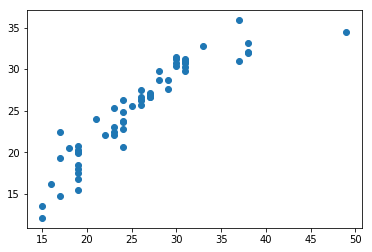

In [58]:
# Since this is regression, plot the predicted y value vs actual y values for the test data

plt.scatter(y_test, y_pred)

# Question 2

In [64]:
df_par = pd.read_csv('parkinson.csv')
df_par.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [66]:
df_par.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [67]:
df_par.name.nunique

<bound method IndexOpsMixin.nunique of 0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
5      phon_R01_S01_6
6      phon_R01_S02_1
7      phon_R01_S02_2
8      phon_R01_S02_3
9      phon_R01_S02_4
10     phon_R01_S02_5
11     phon_R01_S02_6
12     phon_R01_S04_1
13     phon_R01_S04_2
14     phon_R01_S04_3
15     phon_R01_S04_4
16     phon_R01_S04_5
17     phon_R01_S04_6
18     phon_R01_S05_1
19     phon_R01_S05_2
20     phon_R01_S05_3
21     phon_R01_S05_4
22     phon_R01_S05_5
23     phon_R01_S05_6
24     phon_R01_S06_1
25     phon_R01_S06_2
26     phon_R01_S06_3
27     phon_R01_S06_4
28     phon_R01_S06_5
29     phon_R01_S06_6
            ...      
165    phon_R01_S42_1
166    phon_R01_S42_2
167    phon_R01_S42_3
168    phon_R01_S42_4
169    phon_R01_S42_5
170    phon_R01_S42_6
171    phon_R01_S43_1
172    phon_R01_S43_2
173    phon_R01_S43_3
174    phon_R01_S43_4
175    phon_R01_S43_5
176    phon_R01_S43_6
177    phon_R01

In [69]:
X= df_par[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y= df_par['status']

In [70]:
x_train, x_test, y_train,y_test = train_test_split(X,y, random_state = 1, test_size = 0.3)

In [71]:
gr= df_par.groupby(df_par['status'])

In [72]:
gr1= gr.get_group(0) 
gr2= gr.get_group(1)

In [75]:
f,p= f_oneway(gr1['MDVP:Fo(Hz)'],gr2['MDVP:Fo(Hz)'])
p

3.121919402836332e-08

In [76]:
f,p= f_oneway(gr1['MDVP:Fhi(Hz)'],gr2['MDVP:Fhi(Hz)'])
p

0.020275669142798408

In [77]:
df2_par= df_par.drop(columns = 'status',axis =1)
df2_par= df_par.drop(columns = 'name',axis =1)

In [79]:
df2_par.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [81]:
df_par.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [82]:
df_par.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [83]:
# fitting the model
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pre = m1.predict(x_test)
y_pre
#m1.score(X,y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [84]:
sum(y_pre == y_test)

48

In [85]:
cm_3= metrics.confusion_matrix(y_test,y_pre)
print(cm_3)

[[10  9]
 [ 2 38]]


In [86]:
pd.crosstab(y_test,y_pre)

col_0,0,1
status,,
0,10,9
1,2,38


In [87]:
acc=metrics.accuracy_score(y_test,y_pre)
print(acc*100)

81.35593220338984


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

             precision    recall  f1-score   support

          0       0.83      0.53      0.65        19
          1       0.81      0.95      0.87        40

avg / total       0.82      0.81      0.80        59



In [91]:
fpr,tpr,_ = roc_curve(y_test,y_pre)
fpr,tpr,_

(array([0.        , 0.47368421, 1.        ]),
 array([0.  , 0.95, 1.  ]),
 array([2, 1, 0], dtype=int64))

# Here our true postive rate that  is recall or sesnitivity  is 95% and our main aim is focussed on recall because detcting the pd is more important . If a person is having disease and if it is not detected then it is more harmful. 

0.7381578947368421


<Figure size 432x288 with 0 Axes>

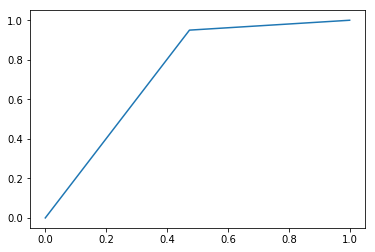

<Figure size 432x288 with 0 Axes>

In [92]:
roc_auc= auc(fpr,tpr)
plt.plot(fpr,tpr)
print(roc_auc)
plt.figure()
#plt.xlim([0.0,0.1])
#plt.ylim([0.0,0.1])

# since the model is having roc value of 0.73 hence it falls under the category of good